In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from collect_functions import *
from constants import *

## Dowload data

In [2]:
def download_data():
    !aws s3 cp s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/ data/videos --recursive

In [3]:
download_data()

download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/D4uiUJ/EgKY/INHCGj/zbg==.json to data/videos/D4uiUJ/EgKY/INHCGj/zbg==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/Aiw2YJ3Sy7wZQ/5AZyANqQ==.json to data/videos/Aiw2YJ3Sy7wZQ/5AZyANqQ==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/5DIO9zwTDprrCtG+syERqg==.json to data/videos/5DIO9zwTDprrCtG+syERqg==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/E+JbbPbjJ98dV0dDeqtKaA==.json to data/videos/E+JbbPbjJ98dV0dDeqtKaA==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/9NCR9oSFZxSzqbvFXGbv1g==.json to data/videos/9NCR9oSFZxSzqbvFXGbv1g==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/8mqvDLqaYkKm/O9j6lcRfQ==.json to data/videos/8mqvDLqaYkKm/O9j6lcRfQ==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/HVDLf2r0y7Gy2fVNe+f8cA==.json to data/videos/HVDLf2r0y7Gy2fVNe+f8cA==.json
downlo

## Collect data in dataframes

In [2]:
# get data files
filenames = [y for x in os.walk(VIDEOS_PATH) for y in glob(os.path.join(x[0], '*.json'))]

# write dataframes to disk
store_all_df(filenames, agg_features="max", agg_survey=False)
store_all_time_series(filenames)

In [57]:
# read mains dataframes
df_features = pd.read_csv(DATAFRAMES_PATH + "df_features_agg_max.csv")
df_generals = pd.read_csv(DATAFRAMES_PATH + "df_generals.csv")
df_answers = pd.read_csv(DATAFRAMES_PATH + "df_answers.csv")

In [58]:
# set indexes of dataframes
df_features.set_index(["user_id", "video_id"], inplace=True)
df_answers.set_index(["user_id", "video_id"], inplace=True)
df_generals.set_index("user_id", inplace=True)

In [59]:
NB_PARTICIPANTS = len(df_generals)
print("We had {0} participations".format(NB_PARTICIPANTS))

We had 45 participations


In [60]:
df_answers.head(10)

fake/natural  stagnant/lively  inert/interactive  \
user_id video_id                                                     
0       1.0                4.0              3.0                3.0   
        2.0                3.0              3.0                4.0   
        3.0                2.0              3.0                4.0   
1       1.0                4.0              3.0                2.0   
        2.0                2.0              3.0                3.0   
        3.0                3.0              4.0                4.0   
2       1.0                1.0              5.0                3.0   
        2.0                1.0              4.0                4.0   
        3.0                1.0              3.0                3.0   
3       1.0                4.0              4.0                3.0   

                  unconscious/conscious  incompetent/competent  \
user_id video_id                                                 
0       1.0                         1.0                    5.0   
        2.0                         4.0                    3.0   
        3.0                         3.0                    4.0   
1       1.0                         2.0                    4.0   
        2.0                         2.0                    3.0   
        3.0                         4.0                    4.0   
2       1.0                         1.0                    4.0   
        2.0                         4.0                    4.0   
        3.0                         2.0                    4.0   
3       1.0                         3.0                    5.0   

                  unintelligent/intelligent  mechanical/organic  \
user_id video_id                                                  
0       1.0                             1.0                 1.0   
        2.0                             2.0                 2.0   
        3.0                             4.0                 3.0   
1       1.0                             3.0                 1.0   
        2.0                             3.0                 1.0   
        3.0                             4.0                 3.0   
2       1.0                             4.0                 1.0   
        2.0                             3.0                 1.0   
        3.0                             3.0                 1.0   
3       1.0                             3.0                 1.0   

                  unresponsive/responsive  foolish/sensible  \
user_id video_id                                              
0       1.0                           5.0               3.0   
        2.0                           4.0               3.0   
        3.0                           3.0               4.0   
1       1.0                           4.0               4.0   
        2.0                           3.0               4.0   
        3.0                           4.0               4.0   
2       1.0                           1.0               3.0   
        2.0                           3.0               3.0   
        3.0                           2.0               1.0   
3       1.0                           4.0               4.0   

                  ignorant/knowledgeable  machinelike/humanlike  \
user_id video_id                                                  
0       1.0                          1.0                    1.0   
        2.0                          3.0                    3.0   
        3.0                          4.0                    4.0   
1       1.0                          3.0                    1.0   
        2.0                          3.0                    1.0   
        3.0                          4.0                    3.0   
2       1.0                          4.0                    1.0   
        2.0                          4.0                    1.0   
        3.0                          2.0                    1.0   
3       1.0                          3.0                    1.0   

                 

In [61]:
df_answers.describe()

,fake/natural,stagnant/lively,inert/interactive,unconscious/conscious,incompetent/competent,unintelligent/intelligent,mechanical/organic,unresponsive/responsive,foolish/sensible,ignorant/knowledgeable,machinelike/humanlike,artificial/lifelike,dead/alive,unpleasant/pleasant,ridig/smooth,dislike/like,irresponsible/responsible,awful/nice,unfriendly/friendly,unkind/kind
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,2.303704,3.311111,3.370370,2.488889,3.607407,3.296296,2.148148,3.274074,3.185185,3.281481,2.177778,2.133333,2.548148,3.325926,3.051852,3.355556,3.437037,3.555556,3.525926,3.555556
std,1.024142,1.162002,1.207815,1.245090,1.079637,1.222147,1.054617,1.224316,1.114258,1.097160,1.177315,1.151249,1.070071,1.164331,1.223639,1.142573,1.033812,1.062710,1.091553,0.959374
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,3.000000,2.500000,1.000000,2.500000,2.500000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2.000000,3.000000,4.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [62]:
df_features.head(10)

nb_timestamps  smile  innerBrowRaise  browRaise  browFurrow  \
user_id video_id                                                                
0       1                  1471    0.0             7.0        1.0         0.0   
        2                  1137   41.0            13.0        0.0         1.0   
        3                  1141    0.0             7.0        1.0         0.0   
1       1                  1146   39.0            14.0       44.0         6.0   
        2                   861    0.0            57.0        2.0         6.0   
        3                  1004    0.0            37.0       99.0         5.0   
2       1                   365    0.0             2.0        1.0        19.0   
        2                   234    0.0             0.0        1.0         1.0   
        3                   260   80.0             1.0        2.0         1.0   
3       1                  1686   97.0             1.0       11.0         1.0   

                  noseWrinkle  upperLipRaise  lipCornerDepressor  chinRaise  \
user_id video_id                                                              
0       1                 0.0            0.0                 0.0        0.0   
        2                 0.0            0.0                 0.0        2.0   
        3                 0.0            0.0                 0.0        3.0   
1       1                 0.0            0.0                 0.0       15.0   
        2                 0.0            0.0                 4.0        2.0   
        3                 2.0            0.0                 1.0       95.0   
2       1                 0.0            0.0                 0.0        0.0   
        2                 0.0            0.0                 0.0        0.0   
        3                 0.0            0.0                 0.0       95.0   
3       1                 0.0            0.0                 0.0        0.0   

                  lipPucker  lipPress  lipSuck  mouthOpen  smirk  eyeClosure  
user_id video_id                                                              
0       1               0.0      13.0     12.0        0.0    0.0         0.0  
        2               0.0       1.0      5.0        0.0    3.0         0.0  
        3               1.0      10.0      6.0        0.0    2.0        61.0  
1       1              59.0       2.0     20.0        1.0   45.0        34.0  
        2              60.0       6.0      6.0        0.0    0.0         0.0  
        3              52.0      60.0     91.0       19.0  100.0        19.0  
2       1               0.0       1.0     17.0        0.0    0.0        86.0  
        2               0.0      67.0      7.0        0.0    3.0        78.0  
        3               5.0      99.0     54.0        0.0   50.0        57.0  
3       1              30.0       6.0      0.0        0.0    0.0        74.0

In [63]:
df_features.describe()

,nb_timestamps,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,lipSuck,mouthOpen,smirk,eyeClosure
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,843.985185,32.711111,21.807407,46.637037,31.703704,23.066667,14.096296,18.851852,29.888889,24.111111,32.222222,31.696296,35.177778,23.562963,77.792593
std,437.178402,43.304694,31.677361,43.153597,39.396203,36.138870,32.765306,33.634231,37.582678,35.053406,35.894469,39.324572,41.761202,34.418541,35.393965
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,591.000000,0.000000,1.000000,2.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,59.500000
50%,813.000000,0.000000,5.000000,41.000000,7.000000,1.000000,0.000000,0.000000,7.000000,3.000000,13.000000,8.000000,7.000000,3.000000,100.000000
75%,1064.500000,89.500000,26.000000,97.500000,67.000000,37.000000,1.000000,15.000000,66.500000,37.500000,58.500000,68.000000,81.000000,45.500000,100.000000
max,3250.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [64]:
df_generals.head()

,age,gender,robotRealLife
user_id,,,
0,24,Male,0
1,29,Male,1
2,22,Male,1
3,32,Male,0
4,21,Male,1


In [65]:
df_generals.describe()

,age,robotRealLife
count,45.000000,45.000000
mean,30.777778,0.400000
std,14.486497,0.495434
min,18.000000,0.000000
25%,22.000000,0.000000
50%,24.000000,0.000000
75%,34.000000,1.000000
max,76.000000,1.000000


In [66]:
df_generals["gender"].value_counts()

Male      25
Female    20
Name: gender, dtype: int64

## Data cleaning

In [67]:
# minimum lenght of the time series for proper analysis
threshold = 100
# non-meaning full data
indices_to_drop = df_features[df_features.nb_timestamps < 100].index

# remove such videos, and their corresponding answers in the survey
df_features.drop(indices_to_drop, inplace=True)
df_answers.drop(indices_to_drop, inplace=True)

assert(len(df_answers) == len(df_features))

## Data analysis

### Simple linear regression to predict anthropomorphism from features

In [157]:
# keep only answers concerning the anthropomorphism questions,
# aggregate the answers in one value
answers = df_answers[ANTHROPOMORPHISM_COLUMNS].mean(axis=1)
answers

# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_features[CONSIDERED_FEATURES],
                                                    answers, test_size=0.2)

# train the regressor
reg = LinearRegression().fit(X_train, y_train)

mae_train = np.abs((reg.predict(X_train)-y_train)).mean()
mae_test = np.abs((reg.predict(X_test)-y_test)).mean()
print("Mean absoute error on train set: {0}".format(mae_train))
print("Mean absoute error on test set: {0}".format(mae_test))


Mean absoute error on train set: 0.6195338214789474
Mean absoute error on test set: 0.6479958177442041


### Try to predict video_id from features

In [155]:
X = df_features[CONSIDERED_FEATURES]
y = df_features.index.get_level_values(1)
n = 1000
err = []
for i in range(n):
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y, test_size=0.1)


    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    err.append((y_test == y_pred).sum())
print("Average accuracy: {0}%".format(np.mean(err)/len(y_test) *100))

Average accuracy: 26.346153846153847%


### Try to predict video_id from answers

In [156]:
X = df_answers
y = df_features.index.get_level_values(1)
n = 1000
err = []
for i in range(n):
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y, test_size=0.1)


    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    err.append((y_test == y_pred).sum())
print("Average accuracy: {0}%".format(np.mean(err)/len(y_test) *100))

Average accuracy: 67.96923076923078%


### Plot feature

In [171]:
t = pd.read_csv(DATAFRAMES_PATH + "df_" + feature_name + "_1.csv")
t.drop("video_id",inplace=True, axis=1)
t.set_index("user_id", inplace=True)

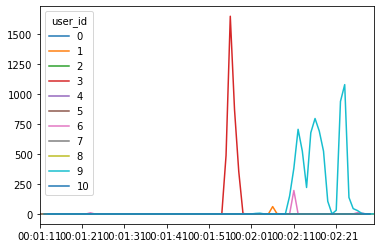

In [175]:
t.loc[0:10].T.plot()

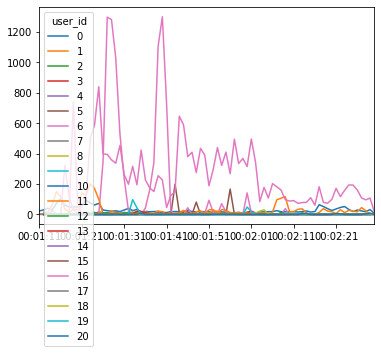

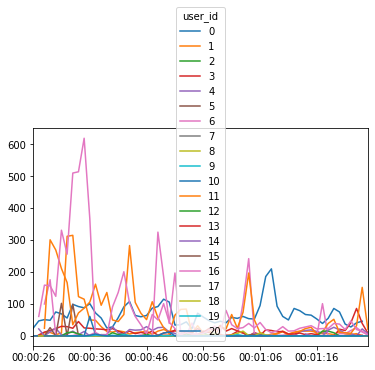

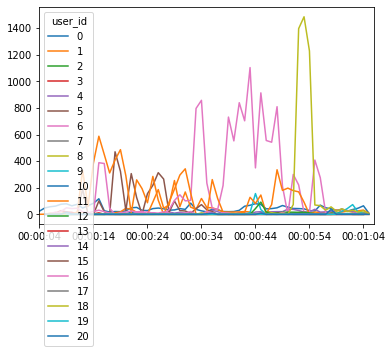

In [182]:
feature_name = "innerBrowRaise"
for i in range(NB_VIDEOS):
    t = pd.read_csv(DATAFRAMES_PATH + "df_" + feature_name + "_{0}.csv".format(str(i+1)))
    t.drop("video_id",inplace=True, axis=1)
    t.set_index("user_id", inplace=True)
    t.loc[0:20].T.plot()
plt.show()

### Features for each video and user

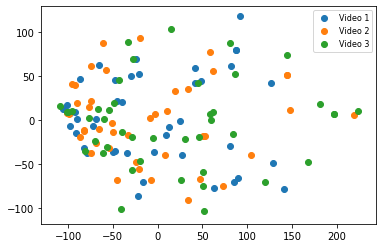

In [35]:
X = df_features.values[:,1:]
pca = PCA(n_components=2)
y = pca.fit_transform(X)
vid1 = plt.scatter(y[::3][:,0], y[::3][:,1])
vid2 = plt.scatter(y[1::3][:,0], y[1::3][:,1])
vid3 = plt.scatter(y[2::3][:,0], y[2::3][:,1])

plt.legend((vid1,vid2,vid3),
           ('Video 1', 'Video 2', 'Video 3'),
         fontsize=8)

plt.show()

### Answers for each video and user

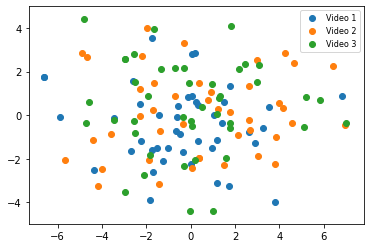

In [36]:
X = df_answers.values
pca = PCA(n_components=2)
y = pca.fit_transform(X)
colors = df_answers.index.get_level_values(1)
vid1 = plt.scatter(y[::3][:,0], y[::3][:,1])
vid2 = plt.scatter(y[1::3][:,0], y[1::3][:,1])
vid3 = plt.scatter(y[2::3][:,0], y[2::3][:,1])

plt.legend((vid1,vid2,vid3),
           ('Video 1', 'Video 2', 'Video 3'),
         fontsize=8)

plt.show()